<a href="https://colab.research.google.com/github/donggale72/10000.html/blob/main/Batch_Normalizaion_Paper_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift

[paper link](https://arxiv.org/pdf/1502.03167.pdf)

## Abstract
* Deep Neural Networks 훈련은 이전 레이어어의 parameters가 변경됨에 따라 training 중에 각 레이어어의 입력 분포가 변경된다는 사실로 인해 복잡함.
* 이는 낮은 learning rates과 신중한 parameter initialization를 요구하여 훈련 속도를 늦추고 포화 비선형성(saturation nonlinearity)을 가진 모델을 훈련시키는 것을 악명 높게 어렵게 만듦.
* 우리는 이 현상을 내부 공변량 이동이라고 하며, 레이어 입력을 정규화하여 문제를 해결.
* 우리의 방법은 정규화를 모델 아키텍처의 일부로 만들고 각 train min-batch에 대한 정규화를 수행하는 것에서 강점을 얻는다.
* 배치 정규화를 사용하면 훨씬 더 높은 학습 속도를 사용하고 초기화에 덜 주의할 수 있다
* 정규화 기능을 수행하면면 경우에 따라 dropout이 필요하지 않습니다. state of the art image classification model에 적용된 배치 정규화는 14배 적은 training steps로 동일한 정확도를 달성하고 원본 모델을 상당한 차이로 능가한다.
* top-5 검증 오류 4.9%(및 4.8% 테스트 오류)에 도달하여 인간 평가자의 정확도를 능가합니다.


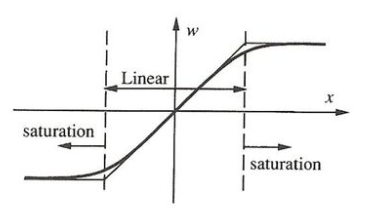

## 1 Introduction

* 딥 러닝은 시각, 음성 및 기타 여러 분야에서 최첨단 기술을 극적으로 발전시켰습니다.
* Stochastic Gradient Descent(SGD)는 딥 네트워크를 트레이닝하는 효과적인 방법임이 입증되었으며, 모멘텀(Sutskever et al., 2013) 및 Adagrad(Duchi et al., 2011)와 같은 SGD 변형은 state of the art 성능을 달성하는 데 사용되었다. SGD는 손실을 최소화하기 위해 네트워크의 매개변수 $Θ$를 최적화합니다

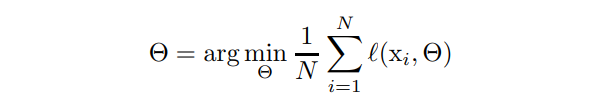

<font size=5>$𝚯=argmin\frac{1}{N}∑\limits_{i=1}^mℓ(x_i,θ)$ 

<font size=5>$𝝝←𝝝 - \frac{α}{m}∑\limits_{i=1}^m\frac{∂F_2(𝚇_i,𝝝_2)}{∂𝝝_2}$



* $x_{1...N}$은 training data set
* SGD를 사용하면 training이 단계적으로 진행되며 각 step에서 $m$ 크기의 min-batch $x_{1...m}$을 고려
* min-batch는 다음 식식을 계산하여 parameters에 대한 손실 함수의 기울기를 근사화하는 데 사용



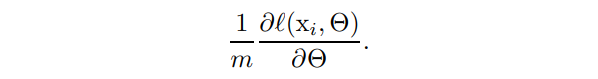

* 한 번에 하나의 예제가 아닌 미니 배치 예제를 사용하면 여러 면에서 도움이 됩니다
* 첫째, 미니 배치에 대한 손실의 기울기는 배치 크기가 증가함에 따라 품질이 향상되는 훈련 세트에 대한 기울기의 추정치임.
* 둘째, 배치에 대한 계산은 현대 컴퓨팅 플랫폼이 제공하는 병렬 처리로 인해 개별 examples에 대한 $m$ computations보다 훨씬 더 효율적일 수 있습니다.


* 확률적 경사는 간단하고 효과적이지만 모델 매개변수의 초기값뿐만 아니라 모델 하이퍼 매개변수, 특히 최적화에 사용되는 학습 속도의 신중한 조정이 필요합니다.

* 각 레이어에 대한 입력이 모든 이전 레이어의 매개변수에 의해 영향을 받아 네트워크 매개변수에 대한 작은 변화가 네트워크가 깊어짐에 따라 증폭된다는 사실로 인해 훈련이 복잡합니다.

* 계층들이 새로운 분포에 지속적으로 적응할 필요가 있기 때문에 계층들의 입력 분포의 변화는 문제를 제시한다.
* learning system의 입력 분포가 변경되면 공변량 이동을 경험함
* 공변량 이동[covariate shift]의 개념은 전체 학습 시스템을 넘어 하위 네트워크 또는 레이어과 같은 부분에 적용할 수 있다.(내부 공변량 이동을 말함)



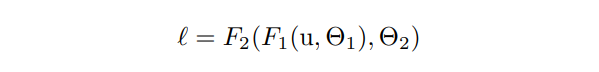

* F1과 F2는 임의 변환이며, 손실ℓ을 최소화하기 위해 파라미터 $Θ1$,$Θ2$를 학습해야 합니다.
* $Θ2$ 학습은 입력 x = F1(u,$Θ1$)가 하위 네트워크에 공급되는 것처럼 볼 수 있다.

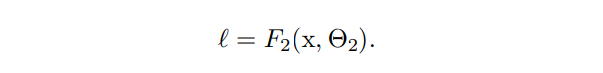

* For example, a gradient descent step

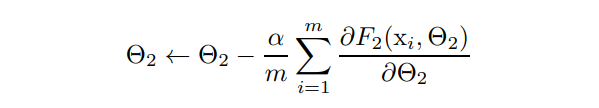

* (배치 크기 m 및 학습률 α의 경우)는 입력이 x인 독립 실행형 네트워크 F2의 경우와 정확히 동일합니다.
* 따라서 training data와 test data 간에 동일한 분포를 갖는 것과 같이 training을 보다 효율적으로 만드는 입력 분포 속성은 하위 네트워크 training에도 적용됩니다.
* 따라서 x의 분포가 시간이 지남에 따라 고정된 상태로 유지되는 것이 유리합니다.
* 따라서 Θ2는 x의 분포 변화를 보상하기 위해 재조정할 필요가 없다.

* Fixed distribution of inputs to a sub-network would have positive consequences for the layers outside the subnetwork, as well. 

* 하위 네트워크에 대한 고정된 입력 분포는 하위 네트워크 외부의 계층에도 긍정적인 결과를 가져올 것입니다.


* Consider a layer with a sigmoid activation function z = g(Wu + b) where u is the layer input, the weight matrix W and bias vector b are the layer parameters to be learned, and g(x) = 1 1+exp(−x). As |x| increases, g ′ (x) tends to zero.

* sigmoid activation function $z = g(Wu + b)$가 있는 레이어를 고려하십시오. 여기서 $u$는 레이어 입력, weight 행렬 $W$ 및 bias 벡터 $b$는 학습할 레이어 파라미터, 그리고 $g(x) = \frac{1}{1+exp(-x)}$ 입니다. $|x|$가 증가하면 $g'(x)$는 0이 되는 경향이 있습니다.

* This means that for all dimensions of x = Wu+b except those with small absolute values, the gradient flowing down to u will vanish and the
model will train slowly.

* 이는 절대값이 작은 차원을 제외한 $x = Wu+b$의 모든 차원에 대해 $u$로 내려가는 기울기가 소멸되고 모델이 느리게 훈련된다는 것을 의미합니다.

* However, since x is affected by W, b and the parameters of all the layers below, changes to those parameters during training will likely move many
dimensions of x into the saturated regime of the nonlinearity and slow down the convergence.

* 그러나 $x$는 $W, b$ 및 그 이전 모든 레이어의 파라미터터에 의해 영향을 받기 때문에 훈련 중에 이러한 파라미터들에 대한 변화는 $x$의 많은 차원이 비선형성의 포화 상태로 이동하고 수렴[convergence] 속도가 느려질 수 있습니다.

* This effect is amplified as the network depth increases. In practice, the saturation problem and the resulting vanishing gradients are usually addressed by using Rectified Linear Units (Nair & Hinton, 2010) ReLU(x) = max(x, 0), careful initialization (Bengio & Glorot, 2010; Saxe et al., 2013), and small learning rates. 

* 실제로 포화 문제와 그로 인한 기울기 소실은 일반적으로 Rectified Linear Units(Nair & Hinton, 2010) $ReLU(x) = max(x, 0)$, 신중한 초기화(Bengio & Glorot, 2010; Saxe et al., 2013) 그리고 작은 learning rates을 사용하여 해결됩니다.

* If, however, we could ensure that the distribution of nonlinearity inputs remains more stable as the network trains, then the optimizer would be less likely to get stuck in the saturated regime, and the training would accelerate.

* 그러나 네트워크가 훈련될 때 비선형성 입력의 분포가 더 안정적으로 유지되도록 할 수 있다면 옵티마이저가 포화 상태에 갇힐 가능성이 줄어들고 훈련이 가속화될 것입니다.

  



---





* We refer to the change in the distributions of internal
nodes of a deep network, in the course of training, as Internal Covariate Shift. 

* 학습 과정에서 deep network의 내부 노드 분포 변화를 Internal Covariate Shift이라고 합니다.

* Eliminating it offers a promise of
faster training. 

* Internal Covariate Shift을 제거하면 더 빠른 훈련이 약속됩니다.

* We propose a new mechanism, which we
call Batch Normalization, that takes a step towards reducing internal covariate shift, and in doing so dramatically accelerates the training of deep neural nets.

* 우리는 내부 공변량 이동을 줄이는 단계를 거쳐쳐 심층 신경망의 훈련을 극적으로 가속화하는 배치 정규화라고 하는 새로운 메커니즘을 제안합니다.


* It accomplishes this via a normalization step that fixes the
means and variances of layer inputs. Batch Normalization
also has a beneficial effect on the gradient flow through
the network, by reducing the dependence of gradients
on the scale of the parameters or of their initial values.

* 레이어 입력의 평균과 분산을 수정하는 정규화 단계를 통해 이를 수행합니다. 배치 정규화는 또한 파라미터의 규모 또는 초기 값에 대한 기울기의 의존성을 줄임으로써 네트워크를 통한 기울기 흐름에 유익한 영향을 미칩니다.


* This allows us to use much higher learning rates without the risk of divergence. 

* 이를 통해 발산의 위험 없이 훨씬 더 높은 학습 속도를 사용할 수 있습니다.



* Furthermore, batch normalization regularizes the model and reduces the need for Dropout (Srivastava et al., 2014).

* 또한 배치 정규화는 모델을 정규화하고 드롭아웃의 필요성을 줄입니다(Srivastava et al., 2014).


* Finally, Batch Normalization makes it possible to use saturating nonlinearities
by preventing the network from getting stuck in the saturated modes.

* 마지막으로 배치 정규화를 사용하면 네트워크가 포화 모드에 갇히는 것을 방지하여 포화 비선형성을 사용할 수 있습니다.

* In Sec. 4.2, we apply Batch Normalization to the bestperforming ImageNet classification network, and show
that we can match its performance using only 7% of the
training steps, and can further exceed its accuracy by a
substantial margin. Using an ensemble of such networks
trained with Batch Normalization, we achieve the top-5
error rate that improves upon the best known results on
ImageNet classification.

* 섹션 4.2에서 우리는 최고 성능의 ImageNet 분류 네트워크에 배치 정규화를 적용하고 training steps의 7%만 사용하여 성능을 일치시킬 수 있으며 정확도를 훨씬 더 초과할 수 있음을 보여줍니다. Batch Normalization으로 훈련된 이러한 네트워크의 앙상블을 사용하여 ImageNet 분류에서 가장 잘 알려진 결과를 개선하는 상위 5개 오류율을 달성합니다.

## 2 Towards Reducing Internal Covariate Shift

* We define Internal Covariate Shift as the change in the distribution of network activations due to the change in network parameters during training. 

* Internal Covariate Shift을 훈련 중 network parameters의 변화로 인한 network activations 분포의 변화로 정의한다.


* To improve the training, we seek to reduce the internal covariate shift.

* Training을 개선하기 위해 Internal Covariate Shift을 줄이려고 합니다


* By fixing the distribution of the layer inputs x as the training progresses, we expect to improve the training speed.

* Training이 진행됨에 따라 레이어 입력 x의 분포를 고정함으로써 Training 속도를 개선할 것으로 기대합니다


* It has been long known (LeCun et al., 1998b; Wiesler & Ney,2011) that the network training converges faster if its inputs are whitened – i.e., linearly transformed to have zero means and unit variances, and decorrelated.

* 네트워크 훈련은 입력이 whitening 되면 더 빨리 수렴한다는 것(즉, 평균과 단위 분산이 0으로 선형 변환되고 비상관화[decorrelation]됨)은 오래 전부터 알려져 왔다(LeCun et al., 1998b; Wiesler & Ney,2011).


* As each layer observes the inputs produced by the layers below, it would
be advantageous to achieve the same whitening of the inputs of each layer. 

* 각 레이어는 이전 레이어에서 생성된 입력을 관찰하므로 각 레이어의 입력에 대해 동일한 whitening을 달성하는 것이 유리합니다.


* By whitening the inputs to each layer,
we would take a step towards achieving the fixed distributions of inputs that would remove the ill effects of the
internal covariate shift.

* 각 레이어에 대한 입력을 whitening함으로써 내부 공변량 이동의 악영향을 제거하는 고정된 입력 분포를 달성하는 단계를 거칠 것입니다.

* We could consider whitening activations at every training step or at some interval, either by modifying the
network directly or by changing the parameters of the
optimization algorithm to depend on the network activation values (Wiesler et al., 2014; Raiko et al., 2012;
Povey et al., 2014; Desjardins & Kavukcuoglu).

* 네트워크를 직접 수정하거나 네트워크 activation 값에 따라 optimization 알고리즘의 parameters를 변경하여 모든 training step 또는 일부 interval에서 whitening activations를 고려할 수 있습니다(Wiesler et al., 2014; Raiko et al., 2012 ; Povey et al., 2014; Desjardins & Kavukcuoglu).

* However, if these modifications are interspersed with the optimization steps, then the gradient descent step may attempt to update the parameters in a way that requires the normalization to be updated, which reduces the effect of the gradient step. 

* 그러나 이러한 수정이 optimization steps에 산재되어 있는 경우 gradient descent step은 정규화를 업데이트해야 하는 방식으로 파라미터를 업데이트하려고 시도할 수 있으며, 이는 gradient step의 효과를 줄입니다.

* For example, consider a layer with the input u that adds the learned bias b, and normalizes the result by subtracting the mean of the activation computed over the training data:

* 예를 들어, 학습된 bias $b$를 더하고 훈련 데이터에 대해 계산된 activation 평균을 빼서 결과를 정규화하는 입력 $u$가 있는 계층을 고려하십시오.

* $\hat{x} = x − E[x]$ \
where $x = u + b,$ \
$𝓧 = \{x_{1...N} \}$ is the set of values of $x$ over
the training set, \
$E[x] = \frac{1}{N}\sum_{i=0}^Nx^i$
.

* If a gradient descent step ignores the dependence of $E[x]$ on $b$, \


* gradient descent step이 $b$에 대한 $E[x]$의 종속성을 무시하는 경우,

* then it will update $b ← b + ∆b$, where $∆b ∝ −∂ℓ/∂\hat{x}$. Then $u + (b + ∆b) − E[u + (b + ∆b)] = u + b − E[u + b]$.

* Thus, the combination of the update to b and subsequent change in normalization led to no change in the output of the layer nor, consequently, the loss. 

* 따라서 $b$에 대한 업데이트와 정규화의 후속 변경의 조합은 레이어의 출력의 변화나 결과적으로 손실의 변화를 초래하지 않았다.

* As the training continues, b will grow indefinitely while the loss remains
fixed. This problem can get worse if the normalization not only centers but also scales the activations. We have observed this empirically in initial experiments, where the model blows up when the normalization parameters are computed outside the gradient descent step.

* 학습이 계속됨에 따라 손실이 고정된 상태에서 b는 무한정 증가합니다. 이 문제는 normalization가 activations를 중심화할 뿐만 아니라 확장[scaling]하는 경우 악화될 수 있습니다. 우리는 normalization 파라미터가 경사하강법 단계 밖에서 계산될 때 모델이 폭발하는 초기 실험에서 이것을 경험적으로 관찰했습니다.

* The issue with the above approach is that the gradient  descent optimization does not take into account the fact  that the normalization takes place. To address this issue,  we would like to ensure that, for any parameter values,  the network always produces activations with the desired  distribution. Doing so would allow the gradient of the  loss with respect to the model parameters to account for  the normalization, and for its dependence on the model  parameters Θ.

* 위 접근법의 문제점은 gradient descent optimization는 normalization가 발생한다는 사실을 고려하지 않는다는 것입니다. 이 문제를 해결하기 위해 <font color="red">우리는 모든 파라미터 값에 대해 네트워크가 항상 원하는 분포로 activation를 생성하도록 하고 싶습니다</font>. 이렇게 하면 모델 파라미터터에 대한 손실의 기울기가 normalization를 설명하고 모델 매개 변수 $𝚯$에 대한 의존성을 설명할 수 있습니다

* Let again x be a layer input, treated as a vector, and X be the set of these inputs over the training data set. The normalization can then be written as a transformation

* 다시 $𝐱$를 벡터로 취급되는 레이어 입력으로 하고, $𝓧$를 훈련 데이터 세트를 통한 이러한 입력의 세트라고 가정합니다. 그런 다음 정규화는 transformation으로 쓰여질 수 있습니다.

* $\hat{𝐱} = Norm(𝐱, 𝓧)$



* which depends not only on the given training example x but on all examples X – each of which depends on Θ if x is generated by another layer. For backpropagation, we would need to compute the Jacobians ignoring the latter term would lead to the explosion described above.

* 이는주어진 training example 𝐱뿐만 아니라 모든 example들 𝒳에 따라 달라집니다. 𝐱가 다른 레이어에서 생성된 경우 각 example는 Θ에 따라 달라집니다. backpropagation의 경우 위에서 설명한 폭발로 이어질 후자 항을 무시하는 Jacobians를 계산해야 합니다.

𝒳

<center>$\frac{\partial Norm(𝐱,𝓧)}{\partial 𝐱}$ and $\frac{\partial Norm(𝐱,𝓧)}{\partial 𝓧}$</center>

* Within this framework, whitening the layer inputs is expensive, as it requires computing the covariance matrix $Cov[𝐱] = E_{𝐱∈𝓧}[𝐱𝐱^T] - E[𝐱]E[𝐱]^T$ and its inverse square root, to produce the whitened activations $Cov[𝐱]^{-1/2}(𝐱-E[𝐱])$, as well as the derivatives of these transforms for backpropagation.

* 이 프레임워크 내에서 레이어 입력을 whitening하는 것은 공분산 행렬 $Cov[𝐱] = E_{𝐱∈𝓧}[𝐱𝐱^T] - E[𝐱]E[𝐱]^T$과 그 역제곱근을 계산하여 whitened activations $Cov[𝐱]^{-1/2}(x-E[𝐱])$뿐만 아니라 backpropagation를 위한 이러한 transforms의 미분을 생성해야 하기 때문에 비용이 많이 든다.

* This motivates us to seek an alternative that performs input normalization in a way that is differentiable and does not require the analysis of the entire training set after every parameter update.

* 이는 미분 가능하고 모든 파라미터 업데이트 후 전체 훈련 세트의 분석이 필요하지 않은 방식으로 입력 정규화를 수행하는 대안을 모색하도록 동기를 부여한다.

* Some of the previous approaches (e.g.(Lyu & Simoncelli, 2008)) use statistics computed over a single training example, or, in the case of image networks, over different feature maps at a given location.
However, this changes the representation ability of a network by discarding the absolute scale of activations. We want to a preserve the information in the network, by normalizing the activations in a training example relative to the statistics of the entire training data.

* 이전 접근 방식 중 일부(예:(Lyu & Simoncelli, 2008))는 single training example 또는 image networks의 경우 주어진 location에서 다른 feature maps에 대해 계산된 통계를 사용합니다.
그러나 이것은 activations의 absolute scale를 버림으로써 네트워크의 representation 능력을 변경합니다. 우리는 전체 training data의 통계와 관련하여 training example의 activations를 정규화하여 네트워크의 정보를 보존하려고 합니다.

## 3 Normalization via Mini-Batch Statistics

* Since the full whitening of each layer’s inputs is costly and not everywhere differentiable, we make two necessary simplifications.

* 각 레이어의 입력을 완전히 whitening하는 것은 비용이 많이 들고 모든 곳에서 미분할 수 있는 것은 아니기 때문에, 우리는 두 가지 필요한 단순화를 만든다.

* The first is that instead of whitening the features in layer inputs and outputs jointly, we will normalize each scalar feature independently, by making it have the mean of zero and the variance of 1. For a layer with d-dimensional input x = (x(1) . . . x(d)), we will normalize each dimension where the expectation and variance are computed over the training data set. As shown in (LeCun et al., 1998b), such normalization speeds up convergence, even when the features are not decorrelated.


* 첫 번째는 레이어 입력과 출력의 features을 공동으로 whitening하는 대신, 우리는 0의 평균과 1의 분산을 가짐으로써 각 스칼라 feature을 독립적으로 정규화할 것이다. d차원 입력 $x = (x^{(1)} . . x^{(d)})$를 가진 레이어의 경우, 우리는 훈련 데이터 세트에 대해 기대치와 분산이 계산되는 각 차원을 정규화할 것이다. 

<center>$\hat{x}^{(k)}=\frac{x^{(k)}-E[x^{(k)}]}{\sqrt{Var[x^{(k)}]}}$</center>

* (LeCun et al., 1998b)에서 보는 바와 같이, 이러한 정규화는 feature들이 비상관되지 않은 경우에도 수렴 속도를 높인다.

* Note that simply normalizing each input of a layer may change what the layer can represent. For instance, normalizing the inputs of a sigmoid would constrain them to the linear regime of the nonlinearity. To address this, we make sure that the transformation inserted in the network can represent the identity transform. 

* 레이어의 각 입력을 단순히 정규화하면 레이어가 표현할 수 있는 내용이 변경될 수 있습니다. 예를 들어, 시그모이드의 입력을 정규화하면 비선형성의 선형 영역으로 제한됩니다. 이 문제를 해결하기 위해 네트워크에 삽입된 변환이 identity transform을 나타낼 수 있는지 확인합니다.

* To accomplish this, we introduce, for each activation x(k), a pair of parameters γ(k), β(k), which scale and shift the normalized value:

* 이를 달성하기 위해 각 activation $x^{(k)}$에 대해 정규화된 값을 스케일링하고 이동하는 한 쌍의 매개변수 $γ^{(k)}$, $β^{(k)}$를 도입합니다.

<center>$y^{(k)} = γ^{(k)}\hat{x}^{(k)}+ β^{(k)}$</center>

* These parameters are learned along with the original model parameters, and restore the representation power of the network. Indeed, by setting Z and K, we could recover the original activations, if that were the optimal thing to do.

* 이러한 파라미터들은 원래 모델 파라미터들과 함께 학습되며 네트워크의 representation을 복원합니다. 실제로 $γ^{(k)}=\sqrt{Var[x^{(k)}]}$ 와 $β^{(k)}=E[x^{(k)}]$를 설정하면 원래 activations을 복구할 수 있습니다.

* In the batch setting where each training step is based on the entire training set, we would use the whole set to normalize activations. However, this is impractical when using stochastic optimization. Therefore, we make the second simplification: since we use mini-batches in stochastic gradient training, each mini-batch produces estimates of the mean and variance of each activation.

* 각 training step가 전체 training set를 기반으로 하는 batch 설정에서 전체 세트를 사용하여 activations를 정규화합니다. 그러나 이것은 stochastic optimizatio를 사용할 때 비실용적입니다. 따라서 우리는 두 번째 단순화를 만듭니다. stochastic gradient training에서 mini-batch를 사용하기 때문에 각 mini-batch는 각 activation의 평균 및 분산에 대한 추정치를 생성합니다.

* This way, the statistics used for normalization can fully participate in the gradient backpropagation. Note that the use of minibatches is enabled by computation of per-dimension variances rather than joint covariances; in the joint case, regularization would be required since the mini-batch size is  likely to be smaller than the number of activations being whitened, resulting in singular covariance matrices.

* 이렇게 하면 정규화에 사용되는 통계가 gradient backpropagation에 완전히 참여할 수 있습니다. minibatches의 사용은 joint covariances[공분산]이 아닌 차원별 분산 계산을 통해 가능합니다. 공동의 경우[joint case] mini-batch 크기가 whitening 되는 activations 수보다 작을 가능성이 높기 때문에 정규화가 필요하며 결과적으로 단일 공분산 행렬[singular covariance matrices]이 생성됩니다.

* Consider a mini-batch B of size m. Since the normalization is applied to each activation independently, let us focus on a particular activation x(k) and omit k for clarity. We have m values of this activation in the mini-batch,

* $m$ 크기의 mini-batch $B$를 생각해 보자. 정규화는 각 activation에 독립적으로 적용되므로 명확성을 위해 특정 activation $x^{(k)}$에 초점을 맞추고 $k$를 생략한다. mini-batch에 이 activation의 $m$ 값이 있습니다,

<center>$B = {x_{1...m}}$</center>

* Let the normalized values be x1...m, and their linear transformations be y1...m. We refer to the transform as the Batch Normalizing Transform.

* 정규화된 값을 $\hat{x}_1...m,$ 선형 변환을 $y1...m$이라고 합니다. 이 변환을 Batch Normalizing Transform이라고 합니다.

* We present the BN Transform in Algorithm 1. In the algorithm, ǫ is a constant added to the mini-batch variance for numerical stability

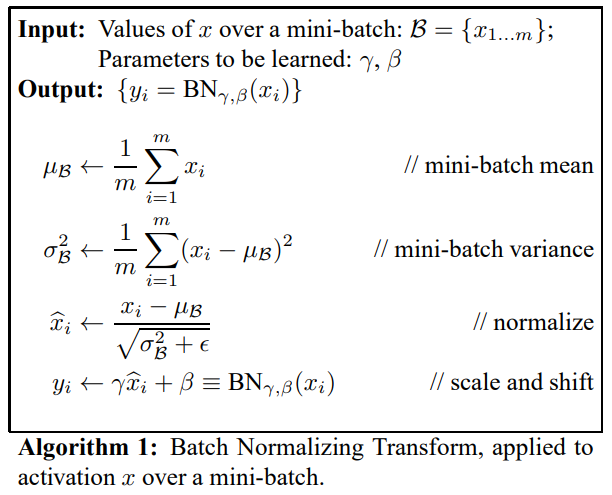

* Algorithm 1에서 BN 변환을 제시합니다. 알고리즘에서 $\epsilon$는 수치 안정성을 위해 mini-batch variance에 추가된 상수입니다.

* The BN transform can be added to a network to manipulate any activation.
In the notation y = BNγ,β(x), we indicate that the parameters γ and β are to be learned, but it should be noted that the BN transform does not independently process the activation in each training example.

* activation를 조작하기 위해 BN transform을 네트워크에 추가할 수 있습니다.
$y = BN_{γ,β}(x)$ 표기법에서 파라미터 $γ$ 및 $β$가 학습되어야 함을 나타내지만 BN transform은 각 training example에서 activation를 독립적으로 처리하지 않는다는 점에 유의해야 합니다.

* Rather, BNγ,β(x) depends both on the training example and the other examples in the mini-batch.

* 오히려 $BN_{γ,β}(x)$는 training example와 mini-batch의 다른 examples 모두에 따라 달라집니다.

* The scaled and shifted values $y$ are passed to other network layers. 

* scaling되고 shifting된 값 $y$는 네트워크의 다른 레이어로 전달됩니다.

* The normalized activations x^hat are internal to our transformation, but their presence is crucial. The distributions of values of any x^hat has the expected value of 0 and the variance of 1, as long as the elements of each mini-batch are sampled from the same distribution, and if we neglect ǫ.

* 정규화된 activations $\hat{x}$는 우리의 변환에 내부적이지만, 그 존재가 매우  중요합니다. 각 미니 배치의 elements가 동일한 분포에서 샘플링되고 $\epsilon$를 무시하는 경우,  $\hat{x}$ 값의 분포는 0의 기대값과 1의 분산을 갖습니다.

* This can be seen by observing that k = 0 and  z = 1, and taking expectations. 

* 이것은 $\sum_{i=1}^m \hat{x_i} = 0$ 및 $\frac{1}{m}\sum_{i=1}^m \hat{x}^2_i= 1$임을 관찰하고 기대치를 취함으로써 알 수 있습니다.

* Each normalized activation x(k) can be viewed as an input to a sub-network composed of the linear transform y(k) = β(k), followed by the other processing done by the original network. 

* 각각의 정규화된 activation $\hat{x}$는 선형 변환 $y^{(k)} = γ^{(k)}\hat{x}^{(k)} + β^{(k)}$로 구성된 하위 네트워크에 대한 입력으로 볼 수 있으며, 원래 네트워크가 수행하는 다른 처리로 볼 수 있습니다.

* These sub-network inputs all have fixed means and variances, and although the joint distribution of these normalized xb(k) can change over the course of training, we expect that the introduction of normalized inputs accelerates the training of the sub-network and, consequently, the network as a whole.

* 이러한 하위 네트워크 입력은 모두 고정된 평균과 분산을 가지고 있으며, 이러한 정규화된 $\hat{x}^{(k)}$의 joint distribution는 훈련 과정에 따라 변할 수 있지만, 정규화된 입력의 도입이 하위 네트워크와 결과적으로 네트워크 전체의 훈련을 가속화할 것으로 예상한다.

* During training we need to backpropagate the gradient of loss $ℓ$ through this transformation, as well as compute the gradients with respect to the parameters of the BN transform. We use chain rule, as follows (before simplification):

* 학습하는 동안 이 transformation을 통해 손실 ℓ의 gradient를 backpropagate하고 BN transformation의 파라미터에 대한 gradient를 계산해야 합니다. 다음과 같이 chain rule을 사용합니다.

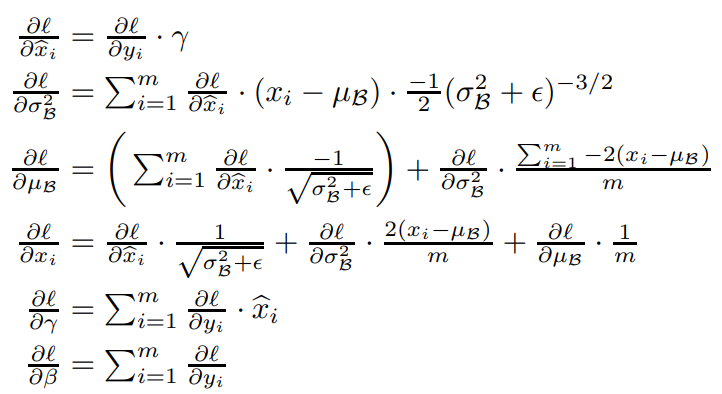

* Thus, BN transform is a differentiable transformation that introduces normalized activations into the network. This ensures that as the model is training, layers can continue learning on input distributions that exhibit less internal covariate shift, thus accelerating the training. Furthermore, the learned affine transform applied to these normalized activations allows the BN transform to represent the identity transformation and preserves the network capacity.

* 따라서 BN transform은 정규화된 activations를 네트워크에 도입하는 미분 가능한 transformation입니다. 이렇게 하면 모델이 훈련될 때 레이어들이 내부 공변량 이동이 적은 입력 분포에 대해 계속 학습할 수 있으므로 훈련이 가속화됩니다. 또한 이러한 정규화된 activations에 적용되고 학습된 affine transform을 통해 BN transform이 identity transformation을 나타내고 네트워크 용량을 보존할 수 있습니다.

### 3.1 Training and Inference with BatchNormalized Networks

* To Batch-Normalize a network, we specify a subset of activations and insert the BN transform for each of them, according to Alg. 1. Any layer that previously received x as the input, now receives BN(x). A model employing Batch Normalization can be trained using batch gradient descent, or Stochastic Gradient Descent with a mini-batch size m > 1, or with any of its variants such as Adagrad(Duchi et al., 2011).

* 네트워크를 Batch-Normalize하기 위해 Alg.1에 따라 activations의 하위 집합을 지정하고 각각에 대해 BN transform을 삽입합니다. 이전에 $x$를 입력으로 받은 레이어는 이제 $BN(x)$를 받습니다. Batch Normalization를 사용하는 모델은 mini-batch 크기 $m > 1$ 또는 Adagrad(Duchi et al., 2011)와 같은 변형을 사용하여 batch gradient descent 또는 Stochastic Gradient Descent을 사용하여 훈련할 수 있습니다.

* The normalization of activations that depends on the mini-batch allows efficient training, but is neither necessary nor desirable during inference; we want the output to depend only on the input, deterministically. For this, once the network has been trained, we use the normalization.

* mini-batch에 의존하는 activations의 정규화는 효율적인 훈련을 가능하게 하지만 inference 중에 필요하지도 바람직하지도 않습니다. 우리는 출력이 결정론적으로 입력에만 의존하기를 원합니다. 이를 위해 일단 네트워크가 훈련되면 정규화를 사용합니다.

<center>$\hat{x}=\frac{x-E[x]}{\sqrt{Var[x] + ϵ}}$</center>

* We use the unbiased variance estimate Var[x] = m/m−1· EB[σ2B], where the expectation is over training mini-batches of size m and σ2B are their sample variances.

* 편향되지 않은 분산 추정값 $Var[x]=\frac{m}{m-1} * E_\beta[𝛔^2_\beta]$를 사용합니다. 여기서 expectation는 크기 m의 미니 배치를 초과하고 $𝛔^2_\beta$는 샘플 분산입니다.
($\frac{m}{m-1}$ : for unbiased estimate)

* Using moving averages instead, we can track the accuracy of a model as it trains. Since the means and variances are fixed during inference, the  normalization is simply a linear transform applied to each activation. It may further be composed with the scaling by γ and shift by β, to yield a single linear transform that replaces BN(x). Algorithm 2 summarizes the procedure for training batch-normalized networks.

* 대신 이동 평균을 사용하여 모델이 훈련될 때 모델의 정확도를 추적할 수 있습니다. 추론 중에 평균과 분산이 고정되기 때문에 정규화는 단순히 각 activation에 적용되는 선형 변환입니다. $BN(x)$를 대체하는 단일 선형 변환을 생성하기 위해 $γ$에 의한 스케일링 및 $β$에 의한 이동으로 추가로 구성될 수 있습니다. Algorithm 2는 batch-normalized networks 훈련 절차를 요약합니다.

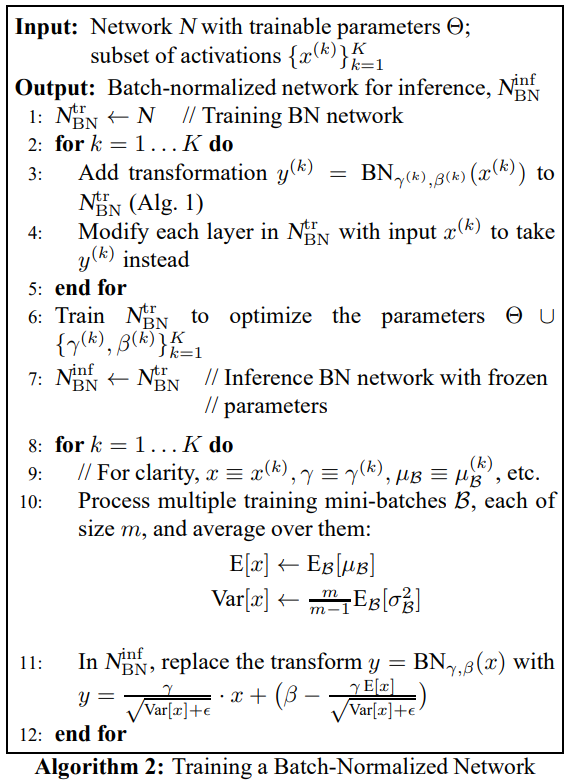


### 3.2 Batch-Normalized Convolutional Networks(omitted)

### 3.3 Batch Normalization enables higher learning rates


* In traditional deep networks, too-high learning rate may result in the gradients that explode or vanish, as well as getting stuck in poor local minima. Batch Normalization helps address these issues. By normalizing activations throughout the network, it prevents small changes to the parameters from amplifying into larger and suboptimal changes in activations in gradients; for instance, it prevents the training from getting stuck in the saturated regimes of nonlinearities.

* 기존의 딥 네트워크에서 학습률이 너무 높으면 gradients가 폭발하거나 사라지고 로컬 최소값에 갇힐 수 있습니다. 배치 정규화는 이러한 문제를 해결하는 데 도움이 됩니다. 네트워크 전체에서 activations를 정규화함으로써 파라미터에 대한 작은 변경 사항이 gradient에서 activations의 더 크고 최적이 아닌 변화로 증폭되는 것을 방지합니다. 예를 들어, 훈련이 포화된 비선형 체제[saturated regimes of nonlinearities]에 갇히는 것을 방지합니다.

* Batch Normalization also makes training more resilient to the parameter scale. Normally, large learning rates may increase the scale of layer parameters, which then amplify the gradient during backpropagation and lead to the model explosion. However, with Batch Normalization, backpropagation through a layer is unaffected by the scale of its parameters.

* Batch Normalization는 또한 parameter scale에 대한 훈련을 더 탄력적으로 만듭니다. 일반적으로 학습률이 크면 레이어 파라미터의 scale이 증가할 수 있으며, 이는 역전파 중에 gradient를 증폭시켜 모델 폭발로 이어집니다. 그러나 Batch Normalization를 사용하면 레이어를 통한 backpropagation가 해당 파라미터의 크기에 영향을 받지 않습니다.

* Indeed, for a scalar a,

<center>$BN(W_u)=BN((aW)u)$</center>

* and we can show that

<center>$\frac{∂BN((aW)u)}{∂u} = \frac{∂BN(Wu)}{∂u}$</center>

<center>$\frac{∂BN((aW)u)}{∂(aW)} = \frac{1}{a} ⋅ \frac{∂BN(Wu)}{∂W}$</center>


* The scale does not affect the layer Jacobian nor, consequently, the gradient  propagation. Moreover, larger weights lead to smaller gradients, and Batch Normalization will stabilize the parameter growth.

* scale은 레이어 Jacobian에 영향을 주지 않으며 결과적으로 gradient  propagation에도 영향을 주지 않습니다. 또한 weights가 클수록 gradients가 작아지고 Batch Normalization은 파라미터 성장을 안정화합니다.

* We further conjecture that Batch Normalization may lead the layer Jacobians to have singular values close to 1, which is known to be beneficial for training (Saxe et al.,2013). 

* 우리는 또한 Batch Normalization가 레이어 야코비안이 훈련에 유리한 것으로 알려진 1에 가까운 특잇값을 갖도록 할 수 있다고 추측한다(Saxe et al., 2013).

* Consider two consecutive layers with normalized inputs, and the transformation between these normalized vectors: z = F(bx).

* 정규화된 입력을 가진 두 개의 연속된 레이어와 이러한 정규화된 벡터 사이의 변환을 고려해보자: $\hat{z} = F(\hat{x})$.

* If we assume that x^hat and z^hat are Gaussian and uncorrelated, and that F(x^hat) ≈ Jx^hat is a linear transformation for the given model parameters, then both x^hat and z^hat have unit covariances, and I = Cov[z^hat] = JCov[x^hat]J^T = JJ^T. Thus, JJ^T = I, and so all singular values of J are equal to 1, which preserves the gradient magnitudes during backpropagation. In reality, the transformation is not linear, and the normalized values are not guaranteed to be Gaussian nor independent, but we nevertheless expect Batch Normalization to help make gradient propagation better behaved. 

* $\hat{x}$와  $\hat{z}$가 가우스이고 상관관계[correlated]가 없으며 $F(\hat{x}) ≈ J\hat{x}$가 주어진 모델 파라미터들에 대한 선형 변환이라고 가정하면 $\hat{x}$와 $\hat{z}$ 모두 단위 공분산을 가지며 $I = Cov[\hat{\hat{z}}] = JCov[\hat{x}]J^T = JJ^T$. 따라서 $JJ^T = I$이므로 $J$의 모든 특이값은 $1$과 같으며 backpropagation 중에 gradient magnitudes를 유지합니다. 실제로 transformation은 선형이 아니며 정규화된 값이 가우시안이거나 독립적이라고 보장되지 않지만 그럼에도 불구하고 Batch Normalization가 gradient propagation가 더 잘 작동하도록 도와줄 것으로 기대합니다.

* The precise effect of Batch Normalization on gradient propagation remains an area of further study.

* 그래디언트 전파에 대한 Batch Normalization의 정확한 효과는 추가 연구 영역으로 남아 있습니다.

### 3.4 Batch Normalization regularizes the model

* When training with Batch Normalization, a training example is seen in conjunction with other examples in the mini-batch, and the training network no longer producing deterministic values for a given training example. In our experiments, we found this effect to be advantageous to the generalization of the network. Whereas Dropout (Srivastava et al., 2014) is typically used to  reduce overfitting, in a batch-normalized network we found that it can be either removed or reduced in strength.


* Batch Normalization로 훈련할 때 미니 배치의 다른 example들과 함께 training example가 표시되며 훈련 네트워크는 더 이상 주어진 훈련 예제에 대해 결정론적 값을 생성하지 않습니다. 우리는 이 효과가 네트워크의 일반화에 유리하다는 것을 발견했다. 드롭아웃(Srivastava et al., 2014)은 과적합을 줄이기 위해 일반적으로 사용되는 반면, 배치 정규화된 네트워크에서 드롭아웃이 제거[미사용]되거나 강도가 감소될 수 있음을 발견했다.

## 4 Experiments

## 4.1 Activations over time

* To verify the effects of internal covariate shift on training, and the ability of Batch Normalization to combat it, we considered the problem of predicting the digit class on the MNIST dataset (LeCun et al., 1998a). We used a very simple network, with a 28x28 binary image as input, and 3 fully-connected hidden layers with 100 activations each. Each hidden layer computes y = g(Wu+b) with sigmoid nonlinearity, and the weights W initialized to small random Gaussian values. The last hidden layer is followed by a fully-connected layer with 10 activations (one per class) and cross-entropy loss. We trained the network for 50000 steps, with 60 examples per mini-batch. We added Batch Normalization to each hidden layer of the network, as in Sec. 3.1. We were interested in the comparison between the baseline and batch-normalized networks, rather than achieving the state of the art performance on MNIST (which the described architecture does not).

* training에 대한 내부 공변량 변화의 효과와 이에 대처하기 위한 Batch Normalization의 능력을 확인하기 위해 우리는 MNIST 데이터 세트에서 숫자 클래스를 예측하는 문제를 고려했습니다(LeCun et al., 1998a). 우리는 입력으로 28x28 바이너리 이미지와 각각 100개의 activations이 있는 완전히 연결된 3개의 히든 레이어가 있는 매우 간단한 네트워크를 사용했습니다. 각 히든 레이어는 시그모이드 비선형성으로 y = g(Wu+b)를 계산하고 weights W는 임의의 가우시안 값으로 초기화됩니다. 마지막 히든 레이어 다음에는 10개의 activations(클래스당 하나)와 교차 엔트로피 손실이 있는 완전히 연결된 계층이 있습니다. 우리는 미니 배치당 60개의 examples로 50,000 step에 대해 네트워크를 training 시켰습니다. 섹션 3.1에서와 같이 네트워크의 각 히든 레이어에 Batch Normalization을 추가했습니다. 우리는 MNIST에서 최첨단 성능을 달성하기보다는 baseline network와 batch-normalized network간의 비교에 관심이 있었습니다.

* Figure 1(a) shows the fraction of correct predictions by the two networks on held-out test data, as training progresses. The batch-normalized network enjoys the higher test accuracy. To investigate why, we studied inputs to the sigmoid, in the original network N and batchnormalized network NtrBN (Alg. 2) over the course of training. In Fig. 1(b,c) we show, for one typical activation from the last hidden layer of each network, how its distribution evolves. The distributions in the original network change significantly over time, both in their mean and the variance, which complicates the training of the subsequent layers. In contrast, the distributions in the batchnormalized network are much more stable as training progresses, which aids the training.

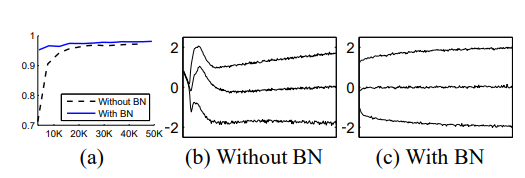

Figure 1: (a) The test accuracy of the MNIST network trained with and without Batch Normalization, vs. the number of training steps. Batch Normalization helps the network train faster and achieve higher accuracy. (b,c) The evolution of input distributions to a typical sigmoid, over the course of training, shown as {15, 50, 85}th percentiles. Batch Normalization makes the distribution more stable and reduces the internal covariate shift.


Figure 1: (a) 배치 정규화를 사용하거나 사용하지 않고 훈련한 MNIST 네트워크의 테스트 정확도 대 training step 횟수. 배치 정규화는 네트워크가 더 빠르게 훈련되고 더 높은 정확도를 달성하는 데 도움이 됩니다. (b,c)훈련 과정에서 입력 분포가 일반적인 시그모이드[S자형]으로 진화하는 * 것으로, {15, 50, 85}번째 백분위수로 표시된다. 배치 정규화는 분포를 보다 안정적으로 만들고 내부 공변량 이동을 줄입니다.

* 그림 1(a)는 training이 진행됨에 따라 보류된 테스트 데이터에 대한 두 네트워크의 올바른 예측 비율을 보여줍니다. 배치 정규화 네트워크는 테스트 정확도가 더 높습니다. 그 이유를 조사하기 위해 training 과정에서 원래 네트워크 N과 배치 정규화 네트워크 $N^{tr}_{BN}(Alg.2)$에서 시그모이드에 대한 입력을 연구했습니다. 그림 1(b,c)에서 우리는 각 네트워크의 마지막 숨겨진 계층에서 하나의 일반적인 활성화에 대해 분포가 어떻게 진화하는지 보여줍니다. 원래 네트워크의 분포는 평균과 분산 모두에서 시간이 지남에 따라 크게 변경되어 후속 계층의 교육을 복잡하게 만듭니다. 반대로 배치 정규화 네트워크의 분포는 훈련이 진행됨에 따라 훨씬 더 안정적이어서 훈련에 도움이 됩니다.

### 4.2 ImageNet classification(omitted)

# How Does Batch Normalization Help Optimization?
[ICS에 대한 반박 논문](https://arxiv.org/pdf/1805.11604.pdf)